<h1 style="text-align: center; color:red;"><b>Recession Predictor</b></h1><br><h3 style="text-align: center;">Using RNN LSTM</h3>

In [43]:
import pandas as pd

In [44]:
df=pd.read_csv('C:\\Users\\code2\\Desktop\\Sem 6\\Recession_predictor\\recessionPT.csv')

In [45]:
df.tail()

,Dates,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,CPI_12mo_pct_chg,...,3M_10Y_Treasury_Spread,3M_10Y_Treasury_Spread_12mo_chg,5Y_10Y_Treasury_Spread,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession
782,01-12-1955,0.038178,0.049044,-0.010866,4.2,-1.1,1.975749,1.52,0.008999,0.003743,...,0.65,-0.90,0.08,0.041447,0.264036,-0.222588,0.091162,0.157120,-0.065958,0
783,01-11-1955,0.035129,0.050815,-0.015686,4.3,-1.4,2.090802,1.39,0.021131,0.001492,...,0.65,-0.80,0.12,0.053960,0.329147,-0.275187,0.053316,0.151562,-0.098246,0
784,01-10-1955,0.038018,0.048685,-0.010667,4.1,-2.0,2.664171,1.11,-0.007450,-0.004842,...,0.90,-0.47,0.12,-0.027114,0.336490,-0.363604,0.031775,0.145834,-0.114060,0
785,01-09-1955,0.048285,0.046799,0.001486,4.2,-1.8,2.332301,0.74,-0.004472,-0.003723,...,1.07,-0.37,0.11,0.064343,0.351594,-0.287251,0.104946,0.145617,-0.040672,0
786,01-08-1955,0.060139,0.044067,0.016072,4.0,-1.8,2.533749,0.88,-0.011891,-0.008537,...,1.30,-0.28,0.18,0.139013,0.447536,-0.308523,0.123816,0.138391,-0.014574,0


In [46]:
df.head()

,Dates,Payrolls_3mo_pct_chg_annualized,Payrolls_12mo_pct_chg,Payrolls_3mo_vs_12mo,Unemployment_Rate,Unemployment_Rate_12mo_chg,Real_Fed_Funds_Rate,Real_Fed_Funds_Rate_12mo_chg,CPI_3mo_pct_chg_annualized,CPI_12mo_pct_chg,...,3M_10Y_Treasury_Spread,3M_10Y_Treasury_Spread_12mo_chg,5Y_10Y_Treasury_Spread,S&P_500_3mo_chg,S&P_500_12mo_chg,S&P_500_3mo_vs_12mo,IPI_3mo_pct_chg_annualized,IPI_12mo_pct_chg,IPI_3mo_vs_12mo,Recession
0,01-02-2021,0.002415,-0.063081,0.065496,6.3,2.8,-1.210140,-1.46,0.021872,0.013001,...,1.00,0.76,0.63,0.081386,0.325690,-0.244304,0.127627,-0.035825,0.163452,0
1,01-01-2021,0.020370,-0.061460,0.081831,6.7,3.1,-1.048808,-1.46,0.022005,0.011388,...,0.84,0.52,0.54,0.135867,0.151517,-0.015650,0.056869,-0.054077,0.110947,0
2,01-12-2020,0.047879,-0.058969,0.106848,6.7,3.1,-1.104699,-1.46,0.029050,0.011947,...,0.78,0.51,0.48,0.116881,0.162589,-0.045708,0.068299,-0.049723,0.118023,0
3,01-11-2020,0.088152,-0.059258,0.147410,6.9,3.3,-1.319961,-1.74,0.045324,0.014100,...,0.69,0.63,0.45,0.034660,0.153025,-0.118366,0.211005,-0.062808,0.273813,0
4,01-10-2020,0.122018,-0.062539,0.184558,7.8,4.3,-1.234780,-1.95,0.056956,0.013248,...,0.57,0.76,0.41,-0.000355,0.076509,-0.076863,0.546238,-0.065500,0.611738,0


<p style="color: green;">In the dataset we have chosen <b>Recession</b> as our target variable</p>

In [47]:
    df1=df.reset_index()['Recession']
    # .reset_index makes the values in index as a coloumn 

In [48]:
df1
#787 records till to 1 march 2021

0      0
1      0
2      0
3      0
4      0
      ..
782    0
783    0
784    0
785    0
786    0
Name: Recession, Length: 787, dtype: int64

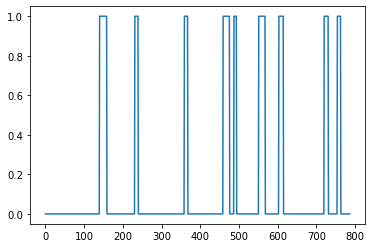

In [49]:
import matplotlib.pyplot as plt
plt.plot(df1)

In [50]:
    df1

0      0
1      0
2      0
3      0
4      0
      ..
782    0
783    0
784    0
785    0
786    0
Name: Recession, Length: 787, dtype: int64

In [51]:
import numpy as np


In [52]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
#   x_scaled=(X_value-x_min)/(x_max-x_min)
#fit_transform() is used on the training data so that we can scale the training data and also learn the scaling parameters of that data.
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [53]:
print(df1)
df1.shape

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.

(787, 1)

<p style="color: green;">As it is a <b>Timeseries</b> data the data should be sorted with respect to dates. Secondly, Crossvalidation and random seed works in regression or classification problem but in case of Timeseries data, we take sorted X% of data as train and other as test data.</p>

In [54]:
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [55]:
training_size,test_size


(511, 276)

In [56]:
train_data


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

<p style="color:red;">Data Preprocessing</p>if we take timesteps as 3 it means if the seguence of our target variable is 120,130,125,140,134,150... . The previous three feature f1 i.e. 120, second feature f2 i.e. 130, third feature f3 i.e. 125 will output the value of fourth feature(<b>output</b>) i.e. 140 should actually be 140. similarly for the next record f1,f2,f3 will be 130,125,140 and output should be 134. So the Output is the <b>y_train</b> and f1,f2,f3 are the <b>x_train</b> if we take timestep as 3. Similarly for y_test, y_train, y's output. <p style="color: green;"></p>

In [57]:
# DATA PREPROCESSING
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [58]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100 #71st element is the output

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

<p style="color:green"><b>x_train</b> consist of 70 features and 440 records and <b>y_train</b> consist of 440 records 
similarly <b>x_test</b> consist of 70 features and 205 records and <b>y_test</b> consist of 205 records as of the data collected on 1 march 2021</p>

In [59]:
print(X_train.shape), print(y_train.shape)
print("\n")
print(X_test.shape), print(y_test.shape)


(410, 100)
(410,)


(175, 100)
(175,)


(None, None)

<p style="color: red">Reshape X_train into 3 dimentional vector because LSTM method in Keras takes 3-D input</p>


In [60]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [61]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [62]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [63]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 100, 50)           10400     
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 50)           20200     
_________________________________________________________________
lstm_5 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [64]:
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)


Epoch 1/100
7/7 [==============================] - 16s 614ms/step - loss: 0.1396 - val_loss: 0.1190
Epoch 2/100
7/7 [==============================] - 2s 273ms/step - loss: 0.1082 - val_loss: 0.1059
Epoch 3/100
7/7 [==============================] - 2s 263ms/step - loss: 0.1028 - val_loss: 0.0984
Epoch 4/100
7/7 [==============================] - 2s 264ms/step - loss: 0.0951 - val_loss: 0.0919
Epoch 5/100
7/7 [==============================] - 2s 272ms/step - loss: 0.0880 - val_loss: 0.0835
Epoch 6/100
7/7 [==============================] - 2s 265ms/step - loss: 0.0860 - val_loss: 0.0733
Epoch 7/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0708 - val_loss: 0.0646
Epoch 8/100
7/7 [==============================] - 2s 268ms/step - loss: 0.0753 - val_loss: 0.0586
Epoch 9/100
7/7 [==============================] - 2s 298ms/step - loss: 0.0650 - val_loss: 0.0526
Epoch 10/100
7/7 [==============================] - 2s 280ms/step - loss: 0.0513 - val_loss: 0.0488
Epoch 11

7/7 [==============================] - 2s 237ms/step - loss: 0.0228 - val_loss: 0.0260
Epoch 84/100
7/7 [==============================] - 2s 237ms/step - loss: 0.0135 - val_loss: 0.0257
Epoch 85/100
7/7 [==============================] - 2s 247ms/step - loss: 0.0296 - val_loss: 0.0260
Epoch 86/100
7/7 [==============================] - 2s 254ms/step - loss: 0.0196 - val_loss: 0.0263
Epoch 87/100
7/7 [==============================] - 2s 253ms/step - loss: 0.0190 - val_loss: 0.0277
Epoch 88/100
7/7 [==============================] - 2s 286ms/step - loss: 0.0250 - val_loss: 0.0281
Epoch 89/100
7/7 [==============================] - 2s 260ms/step - loss: 0.0194 - val_loss: 0.0260
Epoch 90/100
7/7 [==============================] - 2s 258ms/step - loss: 0.0232 - val_loss: 0.0265
Epoch 91/100
7/7 [==============================] - 2s 266ms/step - loss: 0.0176 - val_loss: 0.0258
Epoch 92/100
7/7 [==============================] - 2s 271ms/step - loss: 0.0291 - val_loss: 0.0263
Epoch 93/100


In [65]:
import tensorflow as tf


In [66]:
tf.__version__


'2.4.1'

In [67]:

### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [68]:
##Transformback to original form to find out RMSE performance matrix
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [69]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

0.15152955431494

In [70]:
### Test Data RMSE
math.sqrt(mean_squared_error(y_test,test_predict))

0.16486752821564765

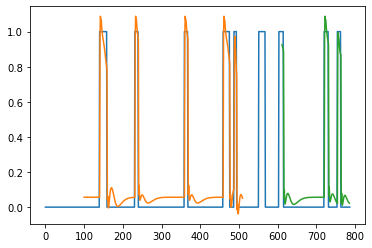

In [71]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

<p style="color:blue">Blue: complete dataset</p>
<p style="color:green">Green: Test data predicted output</p>
<p style="color:orange">Orange: Training dataset prediction </p>

In [72]:
len(test_data)
#276-100=176

276

In [73]:
x_input=test_data[176:].reshape(1,-1)
x_input.shape

(1, 100)

In [74]:

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [75]:
temp_input

[0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0]

In [76]:
# demonstrate prediction for next 30 days
# preddicts single days output adds to the dataset
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(lst_output)

[0.02011752]
101
1 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.  

9 day output [[0.19019791]]
10 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.02011752 0.03355568 0.0481199  0.0638589  0.08092502 0.09940871
 0.1194

17 day output [[0.4597639]]
18 day input [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02011752 0.03355568
 0.0481199  0.0638589  0.08092502 0.09940871 0.11943483 0.14114594
 0.1646885  0.19019791 0.21777967 0.24748707 0.27929476 0.

25 day output [[0.6269702]]
26 day input [0.         0.         0.         0.         0.         0.
 0.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02011752 0.03355568 0.0481199  0.0638589
 0.08092502 0.09940871 0.11943483 0.14114594 0.1646885  0.19019791
 0.21777967 0.24748707 0.27929476 0.31306991 0.3485401  0.38526517
 0.4226149  0.45976391 0.49571007 0.52932602 0.5594

In [77]:
day_new=np.arange(1,101)
day_pred=np.arange(101,31)

In [78]:
import matplotlib.pyplot as plt

In [79]:
len(df1)
df1

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

ValueError: x and y must have same first dimension, but have shapes (0,) and (30, 1)

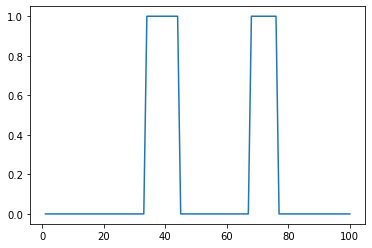

In [80]:
plt.plot(day_new,scaler.inverse_transform(df1[687:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

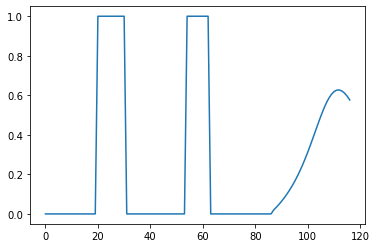

In [81]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[700:])

In [83]:
df3=scaler.inverse_transform(df3).tolist()


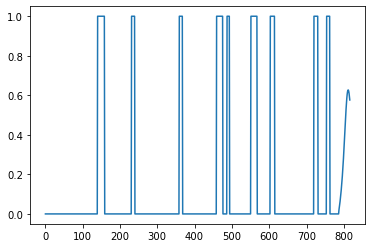

In [84]:
plt.plot(df3)
